In [1]:
import sys, os
import sparse
import xsimlab as xs
import xarray as xr
import numpy as np
import pandas as pd
import igraph as ig
from pgljupyter import SceneWidget

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab
from vmlab.models import vmango
from vmlab.enums import Nature

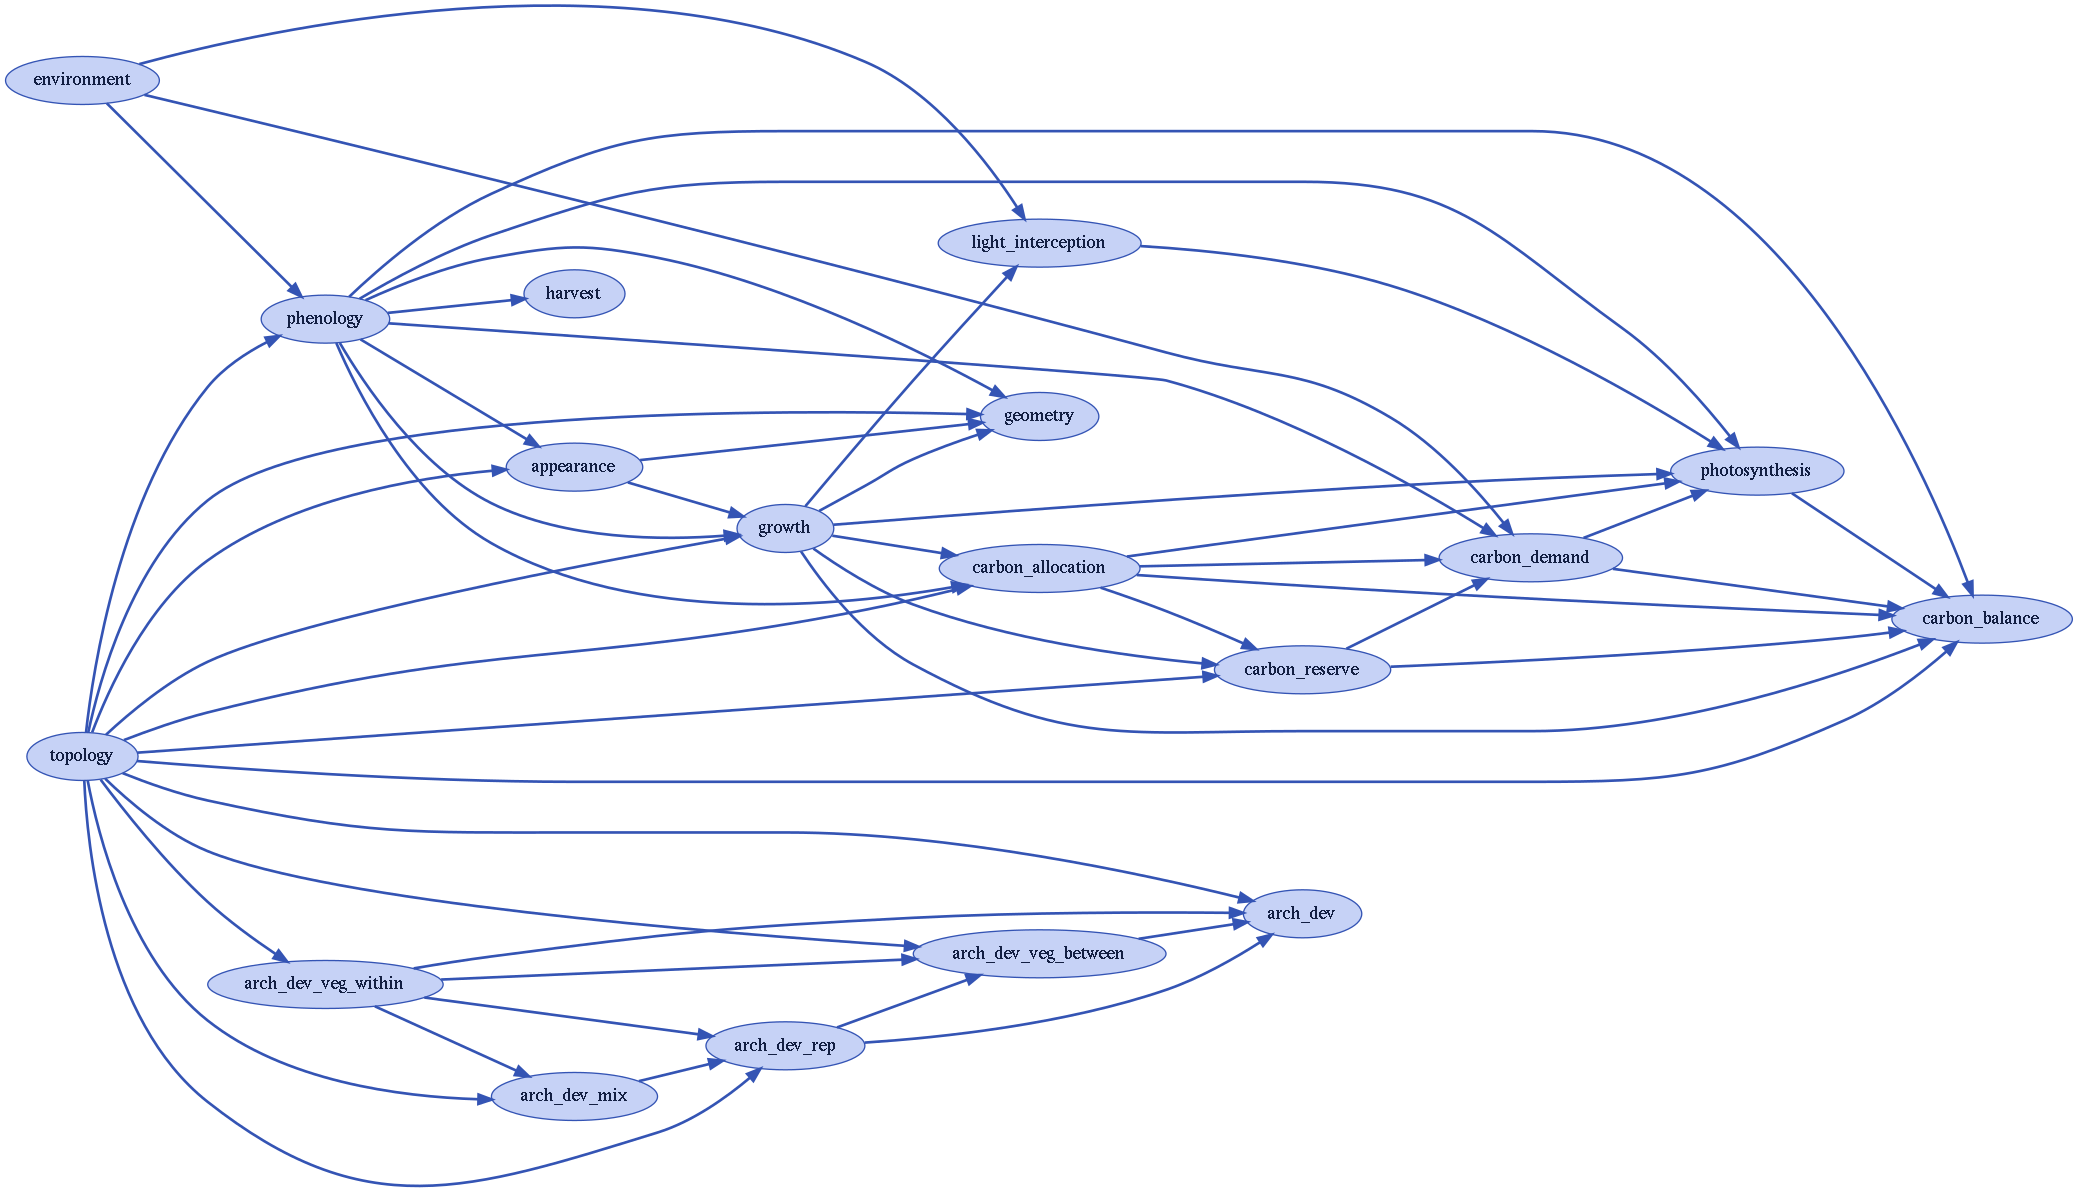

In [3]:
vmango.visualize()

In [4]:
start_date='2003-06-01'
end_date='2006-06-01'
ds = vmlab.create_setup(
    model=vmango,
    start_date=start_date,
    end_date=end_date,
    setup_toml='../share/setup/vmango.toml',
    current_cycle=3,
    input_vars={
        'geometry__interpretation_freq': 14
    },
    output_vars=None
)

In [5]:
sw = SceneWidget(size_world=2.5)
sw

SceneWidget(scenes=[{'id': 'PSV6DPADUGOxoNYJCv4BqvQHY', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

In [6]:
scene_ = None
@xs.runtime_hook(stage='run_step')
def hook(model, context, state):
    global scene_
    scene = state[('geometry', 'scene')]
    if scene != scene_:
        sw.set_scenes([scene], scales=[1/100])
        scene_ = scene
    
ds_out = ds.xsimlab.run(model=vmango, decoding={ 'mask_and_scale': False }, hooks=[xs.monitoring.ProgressBar(), hook])
ds_out

             0% | initialize 

<xarray.Dataset>
Dimensions:                                             (GU: 1773, day: 1097, hour: 24)
Coordinates:
  * GU                                                  (GU) <U10 'GU0' ... '...
  * day                                                 (day) datetime64[ns] ...
  * hour                                                (hour) int8 0 1 ... 23
Data variables:
    appearance__appeared                                (GU) float32 1.0 ... 1.0
    appearance__final_length_gu                         (GU) float32 13.26 .....
    appearance__final_length_inflos                     (GU) object None ... ...
    appearance__final_length_internodes                 (GU) object [5.816673...
    appearance__final_length_leaves                     (GU) object [17.01209...
    appearance__nb_internode                            (GU) float32 13.0 ......
    appearance__parameter_file_path                     <U40 '../share/setup/...
    arch_dev__pot_burst_date                            (GU) datetime64[D] Na...
    arch_dev__pot_flowering_date                        (GU) datetime64[D] Na...
    arch_dev__pot_has_apical_child                      (GU) float32 0.0 ... 0.0
    arch_dev__pot_nature                                (GU) float32 0.0 ... 1.0
    arch_dev__pot_nb_fruit                              (GU) float32 0.0 ... 0.0
    arch_dev__pot_nb_inflo                              (GU) float32 0.0 ... 1.0
    arch_dev__pot_nb_lateral_children                   (GU) float32 0.0 ... 0.0
    arch_dev_mix__has_mixed_inflo_children_between      (GU) float32 0.0 ... 0.0
    arch_dev_mix__parameter_file_path                   <U46 '../share/setup/...
    arch_dev_rep__flowering                             (GU) float32 0.0 ... 1.0
    arch_dev_rep__flowering_date                        (GU) datetime64[D] Na...
    arch_dev_rep__flowering_week                        (GU) float32 0.0 ... 5.0
    arch_dev_rep__fruiting                              (GU) float32 0.0 ... 0.0
    arch_dev_rep__nature                                (GU) float32 0.0 ... 1.0
    arch_dev_rep__nb_fruits                             (GU) float32 0.0 ... 0.0
    arch_dev_rep__nb_inflorescences                     (GU) float32 0.0 ... 1.0
    arch_dev_rep__parameter_file_path                   <U46 '../share/setup/...
    arch_dev_veg_between__burst_date_children_between   (GU) datetime64[D] Na...
    arch_dev_veg_between__burst_month_children_between  (GU) int8 5 5 5 ... 0 0
    arch_dev_veg_between__has_apical_child_between      (GU) float32 0.0 ... 0.0
    arch_dev_veg_between__has_lateral_children_between  (GU) float32 0.0 ... 0.0
    arch_dev_veg_between__has_veg_children_between      (GU) float32 0.0 ... 0.0
    arch_dev_veg_between__nb_lateral_children_between   (GU) float32 0.0 ... 0.0
    arch_dev_veg_between__parameter_file_path           <U54 '../share/setup/...
    arch_dev_veg_within__burst_date_children_within     (GU) datetime64[D] Na...
    arch_dev_veg_within__burst_month_children_within    (GU) int8 5 5 5 ... 0 0
    arch_dev_veg_within__has_apical_child_within        (GU) float32 0.0 ... 0.0
    arch_dev_veg_within__has_lateral_children_within    (GU) float32 0.0 ... 0.0
    arch_dev_veg_within__has_veg_children_within        (GU) float32 0.0 ... 0.0
    arch_dev_veg_within__nb_lateral_children_within     (GU) float32 0.0 ... 0.0
    arch_dev_veg_within__parameter_file_path            <U53 '../share/setup/...
    carbon_allocation__is_photo_active                  (GU) float32 0.0 ... 0.0
    carbon_allocation__parameter_file_path              <U51 '../share/setup/...
    carbon_balance__DM_fruit                            (GU) float32 0.0 ... 0.0
    carbon_balance__DM_fruit_delta                      (GU) float32 0.0 ... 0.0
    carbon_balance__carbon_supply                       (GU) float32 0.0 ... ...
    carbon_balance__parameter_file_path                 <U48 '../share/setup/...
    carbon_balance__remains_1                           (GU) fl

<AxesSubplot:>

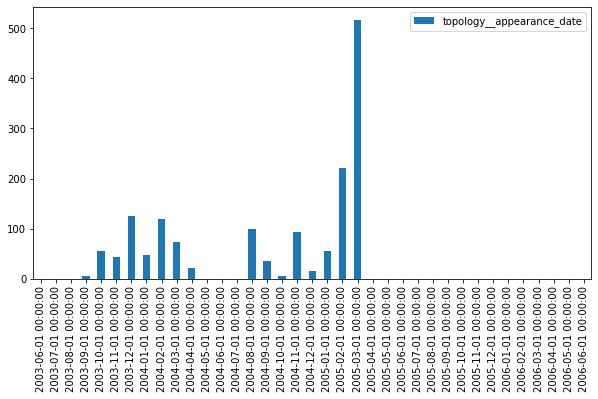

In [7]:
appearance_date = ds_out.topology__appearance_date.groupby(ds_out.topology__appearance_date)
appearance_date.count().to_dataframe().reindex(pd.date_range(start=start_date, end=end_date, freq='MS')).plot.bar(figsize=(10,5))

<AxesSubplot:>

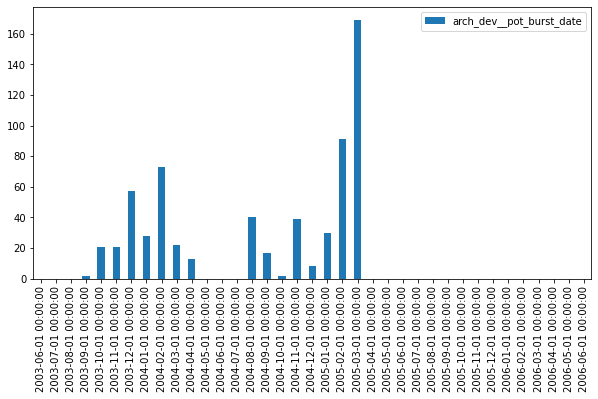

In [8]:
pot_burst_date = ds_out.arch_dev__pot_burst_date.groupby(ds_out.arch_dev__pot_burst_date)
pot_burst_date.count().to_dataframe().reindex(pd.date_range(start=start_date, end=end_date, freq='MS')).plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='arch_dev__pot_flowering_date'>

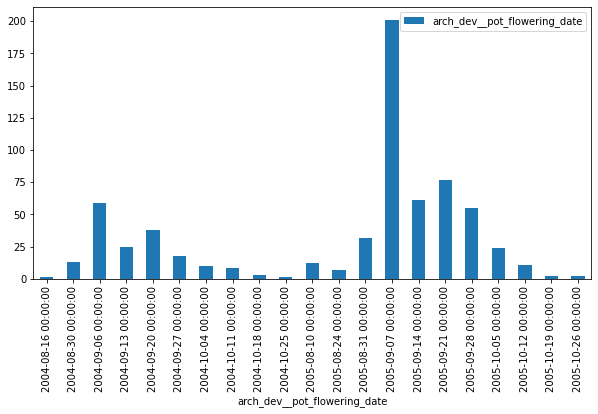

In [9]:
pot_flowering_date = ds_out.arch_dev__pot_flowering_date.groupby(ds_out.arch_dev__pot_flowering_date)
pot_flowering_date.count().to_dataframe().plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='phenology__nb_inflo'>

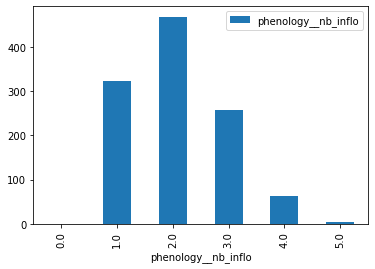

In [10]:
topology__nb_inflo = ds_out.phenology__nb_inflo.groupby(ds_out.phenology__nb_inflo)
topology__nb_inflo.sum().to_dataframe().plot.bar()

<AxesSubplot:xlabel='nb_children'>

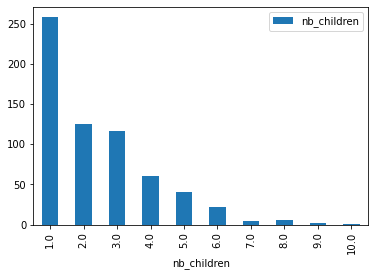

In [11]:
nb_children = xr.DataArray(ds_out.arch_dev__pot_has_apical_child + ds_out.arch_dev__pot_nb_lateral_children, name='nb_children')
nb_children = nb_children[nb_children > 0]
nb_children.groupby(nb_children).count().to_dataframe().plot.bar()

<AxesSubplot:xlabel='topology__cycle'>

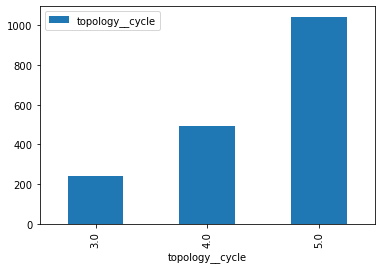

In [12]:
cycle = ds_out.topology__cycle.groupby(ds_out.topology__cycle)
cycle.count().to_dataframe().plot.bar()

<AxesSubplot:xlabel='harvest__nb_fruit_harvested'>

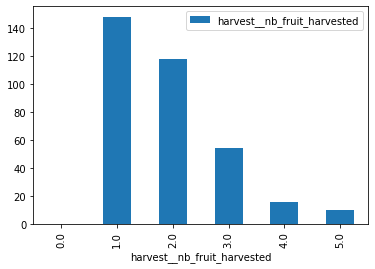

In [13]:
nb_fruit_harvested = ds_out.harvest__nb_fruit_harvested.groupby(ds_out.harvest__nb_fruit_harvested)
nb_fruit_harvested.sum().to_dataframe().plot.bar()